In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

This is useful for sklearn not to get too many warnings (shouldn't use if you don't know what you're doing).

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Load the files

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

### Get information on datasets

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are some missing informations on the Age feature in both datasets (177 for train and 86 for test).<br/>
There are some missing informations on the Fare feature in the test dataset (only 1 actually).<br/>
There are some missing informations on the Cabin feature in both datasets (687 for train and 326 for test).<br/>
There are some missing informations on the Embarked feature in the train dataset (2).

This is also doable all at once with train_df.describe(include="all") but a lot of NaN are in the output and I find it less readable.

In [8]:
train_df.describe() # To get information on all data types except object

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include=['O']) # To get information on object data types

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Training dataset is a bit imbalanced in that 38% of the people survived. <br/>
Most people did not travel with parents/children (Parch) et few people travelled with siblings (SibSp). <br/>
All passengers have unique names and there are more males than females (577 vs 314)

Seems like a good idea to drop the Cabin features as it is not present in many samples.<br/>
PassengerID seems like it's not a useful feature to deduce survival and it has one different value for each sample. Same with the Name feature (though one may assume families were saved together and using some embedding on names might improve the prediction).<br/>
Also, one may want to induce Age for the people who don't have one.<br/>

### Look at correlations with objective

In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived')

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


The Pclass feature, representing the person's class is clearly correlated with the survival probability as upper-classed people had more chance to survive.

In [11]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


The sex is also correlated with the survival as women were more likely to survive.

In [12]:
train_df[["Parch", "SibSp", "Survived"]].groupby(['Parch', 'SibSp'], as_index=False).mean().sort_values(by='Survived')

,Parch,SibSp,Survived
23,6,1,0.000000
21,5,0,0.000000
20,4,1,0.000000
19,4,0,0.000000
15,2,8,0.000000
14,2,5,0.000000
7,1,3,0.000000
8,1,4,0.000000
2,0,2,0.250000
12,2,3,0.285714


We see that a lot of combination of values have either 0% correlation of 100% correlation, therefore it could be nice to derive a feature using those two features.

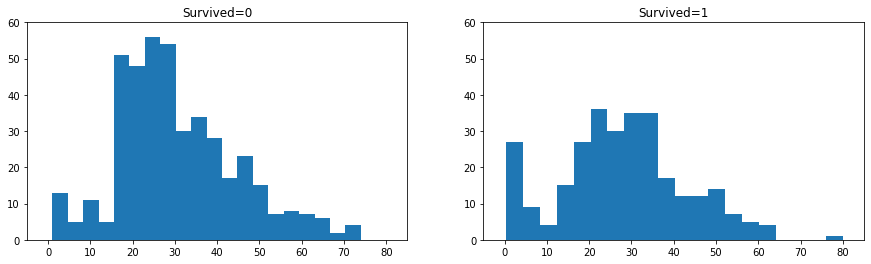

In [13]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
ax1 = axes[0]
ax2 = axes[1]
ax1.hist(train_df[["Age"]][train_df["Survived"]==0], bins=20)
ax1.set_title("Survived=0")
ax1.set_xlim([-5, 85])
ax1.set_ylim([0, 60])
ax2.hist(train_df[["Age"]][train_df["Survived"]==1], bins=20)
ax2.set_title("Survived=1")
ax2.set_xlim([-5, 85])
ax2.set_ylim([0, 60])

plt.show()

We can see here that a lot of children were saved, compared to the young adults. This means there is a correlation between the age and the chance of survival. Therefore, it would be good to fill in the blanks in order to make the Age feature complete.

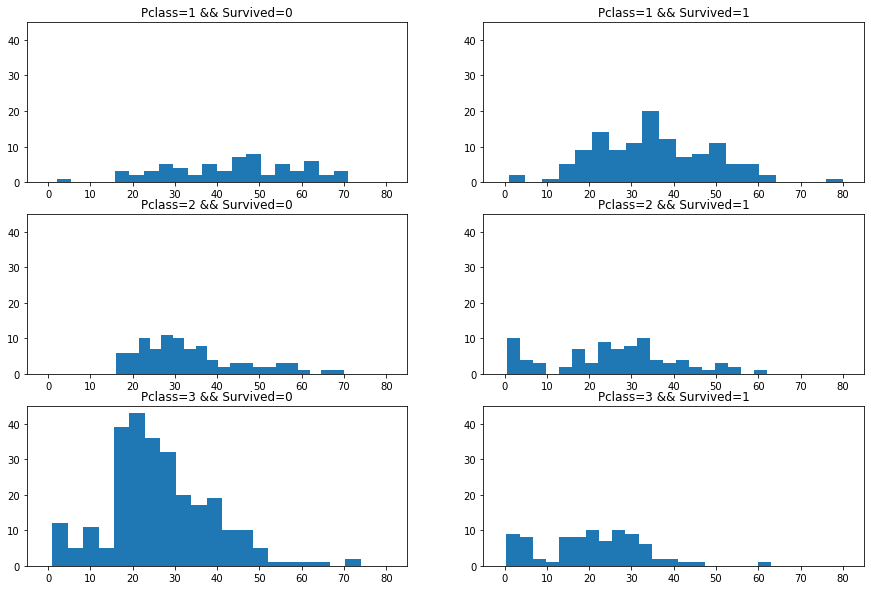

In [14]:
_, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]
ax6 = axes[2, 1]

ax1.hist(train_df[["Age"]][(train_df["Survived"]==0) & (train_df["Pclass"]==1)], bins=20)
ax1.set_title("Pclass=1 && Survived=0")
ax1.set_xlim([-5, 85])
ax1.set_ylim([0, 45])
ax2.hist(train_df[["Age"]][(train_df["Survived"]==1) & (train_df["Pclass"]==1)], bins=20)
ax2.set_title("Pclass=1 && Survived=1")
ax2.set_xlim([-5, 85])
ax2.set_ylim([0, 45])

ax3.hist(train_df[["Age"]][(train_df["Survived"]==0) & (train_df["Pclass"]==2)], bins=20)
ax3.set_title("Pclass=2 && Survived=0")
ax3.set_xlim([-5, 85])
ax3.set_ylim([0, 45])
ax4.hist(train_df[["Age"]][(train_df["Survived"]==1) & (train_df["Pclass"]==2)], bins=20)
ax4.set_title("Pclass=2 && Survived=1")
ax4.set_xlim([-5, 85])
ax4.set_ylim([0, 45])

ax5.hist(train_df[["Age"]][(train_df["Survived"]==0) & (train_df["Pclass"]==3)], bins=20)
ax5.set_title("Pclass=3 && Survived=0")
ax5.set_xlim([-5, 85])
ax5.set_ylim([0, 45])
ax6.hist(train_df[["Age"]][(train_df["Survived"]==1) & (train_df["Pclass"]==3)], bins=20)
ax6.set_title("Pclass=3 && Survived=1")
ax6.set_xlim([-5, 85])
ax6.set_ylim([0, 45])

plt.show()

We see that people that were in upper class (Pclass=1) were more likely to survive, meaning there is a correlation and Pclass is a feature worth using in the prediction.

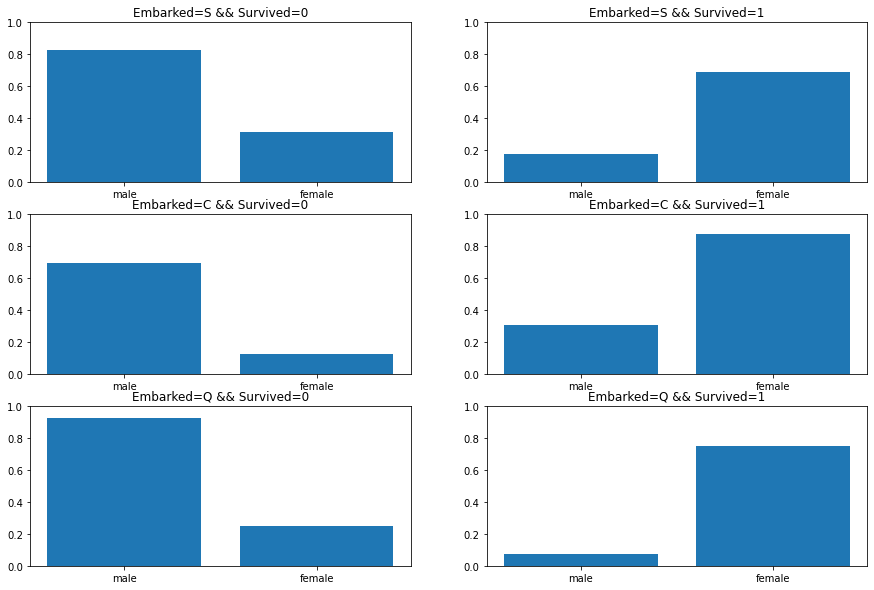

In [15]:
man_death_embarkation_S = ((train_df["Survived"]==0) & (train_df["Embarked"]=="S") & (train_df["Sex"]=="male")).value_counts()[True]/((train_df["Embarked"]=="S") & (train_df["Sex"]=="male")).value_counts()[True]
woman_death_embarkation_S = ((train_df["Survived"]==0) & (train_df["Embarked"]=="S") & (train_df["Sex"]=="female")).value_counts()[True]/((train_df["Embarked"]=="S") & (train_df["Sex"]=="female")).value_counts()[True]
man_survival_embarkation_S = ((train_df["Survived"]==1) & (train_df["Embarked"]=="S") & (train_df["Sex"]=="male")).value_counts()[True]/((train_df["Embarked"]=="S") & (train_df["Sex"]=="male")).value_counts()[True]
woman_survival_embarkation_S = ((train_df["Survived"]==1) & (train_df["Embarked"]=="S") & (train_df["Sex"]=="female")).value_counts()[True]/((train_df["Embarked"]=="S") & (train_df["Sex"]=="female")).value_counts()[True]

man_death_embarkation_C = ((train_df["Survived"]==0) & (train_df["Embarked"]=="C") & (train_df["Sex"]=="male")).value_counts()[True]/((train_df["Embarked"]=="C") & (train_df["Sex"]=="male")).value_counts()[True]
woman_death_embarkation_C = ((train_df["Survived"]==0) & (train_df["Embarked"]=="C") & (train_df["Sex"]=="female")).value_counts()[True]/((train_df["Embarked"]=="C") & (train_df["Sex"]=="female")).value_counts()[True]
man_survival_embarkation_C = ((train_df["Survived"]==1) & (train_df["Embarked"]=="C") & (train_df["Sex"]=="male")).value_counts()[True]/((train_df["Embarked"]=="C") & (train_df["Sex"]=="male")).value_counts()[True]
woman_survival_embarkation_C = ((train_df["Survived"]==1) & (train_df["Embarked"]=="C") & (train_df["Sex"]=="female")).value_counts()[True]/((train_df["Embarked"]=="C") & (train_df["Sex"]=="female")).value_counts()[True]

man_death_embarkation_Q = ((train_df["Survived"]==0) & (train_df["Embarked"]=="Q") & (train_df["Sex"]=="male")).value_counts()[True]/((train_df["Embarked"]=="Q") & (train_df["Sex"]=="male")).value_counts()[True]
woman_death_embarkation_Q = ((train_df["Survived"]==0) & (train_df["Embarked"]=="Q") & (train_df["Sex"]=="female")).value_counts()[True]/((train_df["Embarked"]=="Q") & (train_df["Sex"]=="female")).value_counts()[True]
man_survival_embarkation_Q = ((train_df["Survived"]==1) & (train_df["Embarked"]=="Q") & (train_df["Sex"]=="male")).value_counts()[True]/((train_df["Embarked"]=="Q") & (train_df["Sex"]=="male")).value_counts()[True]
woman_survival_embarkation_Q = ((train_df["Survived"]==1) & (train_df["Embarked"]=="Q") & (train_df["Sex"]=="female")).value_counts()[True]/((train_df["Embarked"]=="Q") & (train_df["Sex"]=="female")).value_counts()[True]


_, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]
ax6 = axes[2, 1]

ax1.bar(["male", "female"], [man_death_embarkation_S, woman_death_embarkation_S])
ax1.set_title("Embarked=S && Survived=0")
ax1.set_ylim([0, 1])
ax2.bar(["male", "female"], [man_survival_embarkation_S, woman_survival_embarkation_S])
ax2.set_title("Embarked=S && Survived=1")
ax2.set_ylim([0, 1])

ax3.bar(["male", "female"], [man_death_embarkation_C, woman_death_embarkation_C])
ax3.set_title("Embarked=C && Survived=0")
ax3.set_ylim([0, 1])
ax4.bar(["male", "female"], [man_survival_embarkation_C, woman_survival_embarkation_C])
ax4.set_title("Embarked=C && Survived=1")
ax4.set_ylim([0, 1])

ax5.bar(["male", "female"], [man_death_embarkation_Q, woman_death_embarkation_Q])
ax5.set_title("Embarked=Q && Survived=0")
ax5.set_ylim([0, 1])
ax6.bar(["male", "female"], [man_survival_embarkation_Q, woman_survival_embarkation_Q])
ax6.set_title("Embarked=Q && Survived=1")
ax6.set_ylim([0, 1])

plt.show()

We can see that women were more likely to survive than men. There might also be a correlation between the embarkation and the chance of survival as men who embarked in "C" were more likely to survive than men who embarked in "Q".

### Prepare the dataset for prediction
The most simple way to deal with incomplete data is to drop it, here we'll drop the Cabin feature because it has a lot of missing values. <br />
Also, we are going to drop the Ticket and the PassengerId features, because intuition says they are not linked to survival rate and, indeed, one has a different value for each passenger, and the second one has a lot of different still (681 different values for 891 samples). <br />
However, we can't really drop the PassengerId the same way as the other two features because it is needed for the submission file. Therefore, it's kept in test_df but special care needs to be paid not to keep it when feeding data to the predictor.

In [16]:
train_df = train_df.drop(["PassengerId", "Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin"], axis=1)

In [17]:
title_dict = {}
for i in range(0, train_df.shape[0]):
    name_words = train_df.iloc[i]["Name"].split()
    for word in name_words:
        if "." in word:
            if word in title_dict:
                title_dict[word] += 1
            else:
                title_dict[word] = 1
for i in range(0, test_df.shape[0]):
    name_words = test_df.iloc[i]["Name"].split()
    for word in name_words:
        if "." in word:
            if word in title_dict:
                title_dict[word] += 1
            else:
                title_dict[word] = 1
title_dict

{'Mr.': 757,
 'Mrs.': 197,
 'Miss.': 260,
 'Master.': 61,
 'Don.': 1,
 'Rev.': 8,
 'Dr.': 8,
 'Mme.': 1,
 'Ms.': 2,
 'Major.': 2,
 'L.': 1,
 'Lady.': 1,
 'Sir.': 1,
 'Mlle.': 2,
 'Col.': 4,
 'Capt.': 1,
 'Countess.': 1,
 'Jonkheer.': 1,
 'Dona.': 1}

Differentiating gender in the title will only add redundancy with the already present *Sex* feature. Therefore, we'll only add two title, one for rare titles (ex: Captain, Countess,...) and one for common titles (ex: Mr.n Mrs., ...). Also, Title is directly added as ordinal features, not categorical.

In [18]:
last_i = -1
titles = []
for i in range(0, train_df.shape[0]):
    name_words = train_df.iloc[i]["Name"].split()
    for word in name_words:
        if "." in word:
            if last_i==i: # If two words have a dot in the name, only consider the first one (the second is related to middle name)
                continue
            last_i = i
            if word in ["Mr.", "Mrs.", "Miss.", "Mme.", "Ms.", "Mlle."]:
                titles.append(0)
            else:
                titles.append(1)
train_df["Title"] = titles

In [19]:
last_i = -1
titles = []
for i in range(0, test_df.shape[0]):
    name_words = test_df.iloc[i]["Name"].split()
    for word in name_words:
        if "." in word:
            if last_i==i: # If two words have a dot in the name, only consider the first one (the second is related to middle name)
                continue
            last_i = i
            if word in ["Mr.", "Mrs.", "Miss.", "Mme.", "Ms.", "Mlle."]:
                titles.append(0)
            else:
                titles.append(1)
test_df["Title"] = titles

In [20]:
train_df[["Title", "Survived"]].groupby(["Title"]).mean()

,Survived
Title,
0,0.375604
1,0.492063


It looks like there's a small correlation between title and survival chance as people with a rarer title seem to have been more likely to survive. Now Name feature can be dropped.

In [21]:
train_df = train_df.drop(["Name"], axis=1)
test_df = test_df.drop(["Name"], axis=1)

Next, we need to convert categorical features, as most algorithms can't work with textual data. In some cases, when you have categorical data with more than 2 values, you must pay attention to the numbers used as this can induce a bias in some algorithms, but we don't do that here. <br />
For now, we only do that for the *Sex* feature, as the *Embarked* feature still needs to be completed first

In [22]:
train_df["Sex"] = train_df["Sex"].map({"male":0, "female":1}).astype(int)
test_df["Sex"] = test_df["Sex"].map({"male":0, "female":1}).astype(int)

In [23]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,0
1,1,1,1,38.0,1,0,71.2833,C,0
2,1,3,1,26.0,0,0,7.9250,S,0
3,1,1,1,35.0,1,0,53.1000,S,0
4,0,3,0,35.0,0,0,8.0500,S,0


We'll now look at completing the continuous *Age* feature. There are different ways to do such a thing. <br />
1) We can simply get a random value using the mean and std of the Age feature, this is the easiest way. <br />
2) We can look at the *n* nearest neighbors in the dataset, and choose a random value between the minimum and the maximum of these nearest neighbors. <br />
3) We can use other correlated features and use the mean and std of similar samples having those correlated features equal (kinda like method 1 but using a specifically chosen subset of the df instead of the whole df). <br/>
Here, we'll be using method 3. Age is correlated to gender and Pclass as shown below, these two will be the correlated features for which we're gonna build 6 subsets (3 for Pclass * 2 for gender). It's possible to do this with other variables aswell, like the title or anything else.

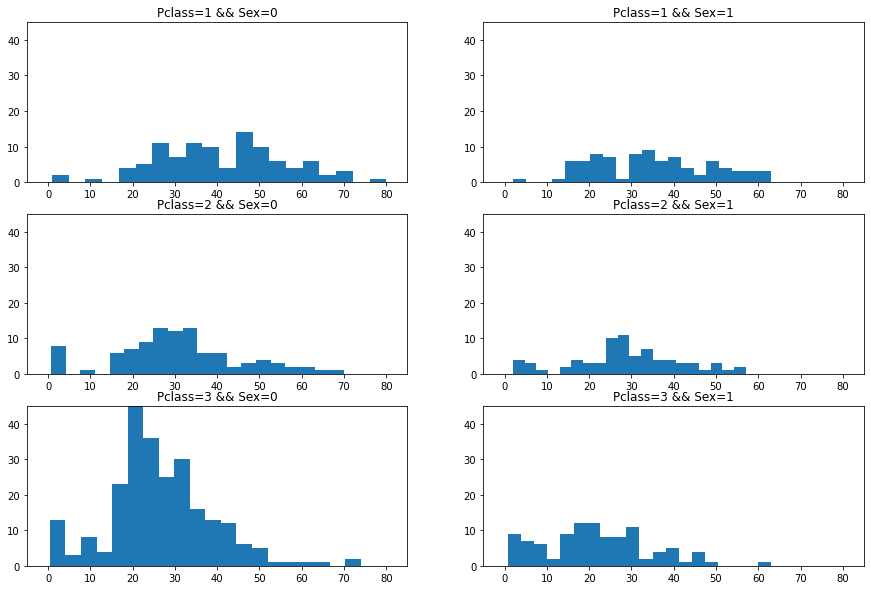

In [24]:
_, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]
ax6 = axes[2, 1]

ax1.hist(train_df[["Age"]][(train_df["Sex"]==0) & (train_df["Pclass"]==1)], bins=20)
ax1.set_title("Pclass=1 && Sex=0")
ax1.set_xlim([-5, 85])
ax1.set_ylim([0, 45])
ax2.hist(train_df[["Age"]][(train_df["Sex"]==1) & (train_df["Pclass"]==1)], bins=20)
ax2.set_title("Pclass=1 && Sex=1")
ax2.set_xlim([-5, 85])
ax2.set_ylim([0, 45])

ax3.hist(train_df[["Age"]][(train_df["Sex"]==0) & (train_df["Pclass"]==2)], bins=20)
ax3.set_title("Pclass=2 && Sex=0")
ax3.set_xlim([-5, 85])
ax3.set_ylim([0, 45])
ax4.hist(train_df[["Age"]][(train_df["Sex"]==1) & (train_df["Pclass"]==2)], bins=20)
ax4.set_title("Pclass=2 && Sex=1")
ax4.set_xlim([-5, 85])
ax4.set_ylim([0, 45])

ax5.hist(train_df[["Age"]][(train_df["Sex"]==0) & (train_df["Pclass"]==3)], bins=20)
ax5.set_title("Pclass=3 && Sex=0")
ax5.set_xlim([-5, 85])
ax5.set_ylim([0, 45])
ax6.hist(train_df[["Age"]][(train_df["Sex"]==1) & (train_df["Pclass"]==3)], bins=20)
ax6.set_title("Pclass=3 && Sex=1")
ax6.set_xlim([-5, 85])
ax6.set_ylim([0, 45])

plt.show()

First, create subsets and calculate mean and std of each subset

In [25]:
ages_attributes = np.zeros((6, 2))
subsets = [[], [], [], [], [], []]
for dataset in [train_df, test_df]:
    for i in range(0, dataset.shape[0]):
        if not np.isnan(dataset.iloc[i]["Age"]):
            if dataset.iloc[i]["Pclass"]==1 and dataset.iloc[i]["Sex"]==0:
                subsets[0].append(dataset.iloc[i]["Age"])
            if dataset.iloc[i]["Pclass"]==1 and dataset.iloc[i]["Sex"]==1:
                subsets[1].append(dataset.iloc[i]["Age"])
            if dataset.iloc[i]["Pclass"]==2 and dataset.iloc[i]["Sex"]==0:
                subsets[2].append(dataset.iloc[i]["Age"])
            if dataset.iloc[i]["Pclass"]==2 and dataset.iloc[i]["Sex"]==1:
                subsets[3].append(dataset.iloc[i]["Age"])
            if dataset.iloc[i]["Pclass"]==3 and dataset.iloc[i]["Sex"]==0:
                subsets[4].append(dataset.iloc[i]["Age"])
            if dataset.iloc[i]["Pclass"]==3 and dataset.iloc[i]["Sex"]==1:
                subsets[5].append(dataset.iloc[i]["Age"])

ages_attributes[0] = np.array([np.mean(subsets[0]), np.std(subsets[0])])
ages_attributes[1] = np.array([np.mean(subsets[1]), np.std(subsets[1])])
ages_attributes[2] = np.array([np.mean(subsets[2]), np.std(subsets[2])])
ages_attributes[3] = np.array([np.mean(subsets[3]), np.std(subsets[3])])
ages_attributes[4] = np.array([np.mean(subsets[4]), np.std(subsets[4])])
ages_attributes[5] = np.array([np.mean(subsets[5]), np.std(subsets[5])])

Then, induce new values using those attributes. The randomly generated age could theoretically be negative so we need to add a clause for it to make sense.

In [26]:
for dataset in [train_df, test_df]:
    new_ages = []
    for i in range(0, dataset.shape[0]):
        if np.isnan(dataset.iloc[i]["Age"]):
            if dataset.iloc[i]["Pclass"]==1 and dataset.iloc[i]["Sex"]==0:
                predicted = np.random.normal(loc=ages_attributes[0,0], scale=ages_attributes[0, 1])
                while predicted<=0:
                    predicted = np.random.normal(loc=ages_attributes[0,0], scale=ages_attributes[0, 1])
                new_ages.append(predicted)
            if dataset.iloc[i]["Pclass"]==1 and dataset.iloc[i]["Sex"]==1:
                predicted = np.random.normal(loc=ages_attributes[1,0], scale=ages_attributes[1, 1])
                while predicted<=0:
                    predicted = np.random.normal(loc=ages_attributes[1,0], scale=ages_attributes[1, 1])
                new_ages.append(predicted)
            if dataset.iloc[i]["Pclass"]==2 and dataset.iloc[i]["Sex"]==0:
                predicted = np.random.normal(loc=ages_attributes[2,0], scale=ages_attributes[2, 1])
                while predicted<=0:
                    predicted = np.random.normal(loc=ages_attributes[2,0], scale=ages_attributes[2, 1])
                new_ages.append(predicted)
            if dataset.iloc[i]["Pclass"]==2 and dataset.iloc[i]["Sex"]==1:
                predicted = np.random.normal(loc=ages_attributes[3,0], scale=ages_attributes[3, 1])
                while predicted<=0:
                    predicted = np.random.normal(loc=ages_attributes[3,0], scale=ages_attributes[3, 1])
                new_ages.append(predicted)
            if dataset.iloc[i]["Pclass"]==3 and dataset.iloc[i]["Sex"]==0:
                predicted = np.random.normal(loc=ages_attributes[4,0], scale=ages_attributes[4, 1])
                while predicted<=0:
                    predicted = np.random.normal(loc=ages_attributes[4,0], scale=ages_attributes[4, 1])
                new_ages.append(predicted)
            if dataset.iloc[i]["Pclass"]==3 and dataset.iloc[i]["Sex"]==1:
                predicted = np.random.normal(loc=ages_attributes[5,0], scale=ages_attributes[5, 1])
                while predicted<=0:
                    predicted = np.random.normal(loc=ages_attributes[5,0], scale=ages_attributes[5, 1])
                new_ages.append(predicted)
        else:
            new_ages.append(dataset.iloc[i]["Age"])
    dataset["Age"] = new_ages

In [27]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.583908,0.523008,0.381594,32.204208,0.070707
std,0.486592,0.836071,0.477990,14.206855,1.102743,0.806057,49.693429,0.256479
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


We can now combine the *SibSp* and *Parch* features into a single feature *Family*

In [28]:
for dataset in [train_df, test_df]:
    dataset["Family"] = dataset["SibSp"]+dataset["Parch"]

In [29]:
train_df = train_df.drop(["SibSp", "Parch"], axis=1)
test_df = test_df.drop(["SibSp", "Parch"], axis=1)

In [30]:
train_df[["Family", "Survived"]].groupby("Family").mean().sort_values(by='Survived', ascending=False)

,Survived
Family,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


There's clearly a correlation between the family and the chance of survival. People with a small family (2 or 3 people) seemed more likely to survive.

We can now complete the *Embarked* feature, which only has 2 missing values. We could just drop those 2 samples, look at the nearest neighbors and take the more common value. However, the simplest way to fill features having a low missing values count is to just use the most common value. We also want to convert it as numeric values, not categorical.

In [31]:
pd.concat([train_df["Embarked"], test_df["Embarked"]]).value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [32]:
for dataset in [train_df, test_df]:
    dataset["Embarked"] = dataset["Embarked"].fillna("S").map({"S":0, "C":1, "Q":2})

In [33]:
pd.concat([train_df["Embarked"], test_df["Embarked"]]).value_counts()

0    916
1    270
2    123
Name: Embarked, dtype: int64

The last thing to do is to handle the Fare feature where there is one missing value for the test set. Here, we'll simply innduce a value using the global mean.

In [34]:
test_df["Fare"] = test_df["Fare"].fillna(pd.concat([train_df["Fare"], test_df["Fare"]]).mean())

In [35]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,0,22.0,7.2500,0,0,1
1,1,1,1,38.0,71.2833,1,0,1
2,1,3,1,26.0,7.9250,0,0,0
3,1,1,1,35.0,53.1000,0,0,1
4,0,3,0,35.0,8.0500,0,0,0


In [36]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,892,3,0,34.5,7.8292,2,0,0
1,893,3,1,47.0,7.0000,0,0,1
2,894,2,0,62.0,9.6875,2,0,0
3,895,3,0,27.0,8.6625,0,0,0
4,896,3,1,22.0,12.2875,0,0,2


### Redundancy check <br />

Before fitting the models, it's always better to check for redundancy. Redundancy causes models to overfit and makes generalization worst. However, if one can make sure that the data distribution is exactly the same in the training and testing sets, then keeping duplicates could make sense as the model will overfit to the training distribution but here it turns out it's the same as the testing distribution. Nevertheless, I almost always remove the duplicates.

In [38]:
print(f"Train data has {train_df.duplicated().sum()} duplicated data")

Train data has 37 duplicated data


In [44]:
train_df = train_df.drop_duplicates()

### Prediction models

First, import the metrics that we'll use to score the model. We'll be using the recall, precision and f1 score here. We're also importing GridSearchCV, which facilitates training our models.

In [45]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

The datasets are now ready to be used with prediction models. We'll be comparing several different models here but the first step is to separate the datasets into X (group of features used) and y (target). <br />
Here, if X_train.shape[1] != X_test.shape[1] something went wrong above

In [46]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1)
print(X_train.shape, y_train.shape, X_test.shape)

(854, 7) (854,) (418, 7)


Some models need the data to be scaled so that an implicit bias is not induced. <br />
Indeed, if data was not scaled and one feature ranged from 0 to 1 whereas another ranged from 0 to 10^6, then the second would implicitely have a much bigger impact on prediction. However, we want the algorithm to decide itself which feature should have a bigger impact than other, which means that we want features to be scaled. This is true for most algorithms but not all of them. Decision trees, for example, do not especially need data to be scaled.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic regression

Let's start with a simple model, the logistic regression (a.k.a. logit regression). This measures the probablility of the target event to happen using a linear combination of the features, considered independant. It gets its name through estimating the probability of the event to happen using a logistic function (=cumulative logistic distribution). <br />

In [48]:
from sklearn.linear_model import LogisticRegression

parameters = {'penalty':("l2", "none"), 
              'C':[0.01, 0.1, 1, 10],
             }

model_logistic_regression = GridSearchCV(LogisticRegression(), parameters)
model_logistic_regression.fit(np.asarray(X_train_scaled), np.asarray(y_train))
print(f"Best score of {model_logistic_regression.best_score_} was achieved with parameters {model_logistic_regression.best_params_}")

Best score of 0.7998004815961474 was achieved with parameters {'C': 1, 'penalty': 'l2'}


In [49]:
model_logistic_regression = LogisticRegression(C=0.01, penalty="none")
model_logistic_regression.fit(np.asarray(X_train_scaled), np.asarray(y_train))
y_pred = model_logistic_regression.predict(X_train_scaled)
print(f"Best logistic regression model got:\n{precision_score(y_train, y_pred)} in precision, ")
print(f"{recall_score(y_train, y_pred)} in recall and\n{f1_score(y_train, y_pred)} in f1 score")

Best logistic regression model got:
0.7717041800643086 in precision, 
0.7164179104477612 in recall and
0.7430340557275541 in f1 score


We can check how the features influanced the prediction. Having a high correlation means that, as the feature value increased, the probability of survival increased aswell. Here, we have that the gender influenced a lot, with gender=1 meaning *female*, which confirms the assumption that women were more likely to survive. Also, The *Pclass* has negative correlation, meaning that as *Pclass* increases, the chance of survival decreases, confirming the assumption that the upper-class members were more likely to survive.

In [50]:
coefficients_df = pd.DataFrame(data=np.concatenate(([train_df.columns.delete(0)], [model_logistic_regression.coef_[0]])).T, columns=["Feature", "Correlation"])
coefficients_df.sort_values(by="Correlation", ascending=False)

,Feature,Correlation
1,Sex,2.987824
5,Title,1.780189
3,Fare,1.574291
4,Embarked,0.287453
0,Pclass,-2.118132
2,Age,-2.579269
6,Family,-3.2742


#### Support vector Machine (SVM)

SVM models try find the best hyperplane to separate the data, *best hyperplane* being calculated using the margins which are the smallest distance between the hyperplane and a data point belonging to each classes (one margin for each class). <br />
As is, an SVM can only perform binary classification, but multiple SVMs can be combined to perform multi-class classification. <br />
Traditionnaly, there was only linear SVMs, that use the data in the plane that it is represented in. However, with time, non-linear SVMs appeared which basically work the same way but use a different representation of the data. This can something help in finding a better Hyperplane. (Mathematically speaking, this translate into a kernel product instead of a simple product between the data points)<br />
The value of C represents the penalization of misclassified samples. This means a higher value of C will penalize the errors more and approaches "hard-margin" while a lower value of C means we don't penalize the errors that much and approaches "soft-margin". <br />
For this classifier, it's a good practice to scale the features so that they all have the same weight. Here, we're gonna scale all features between 0 and 1.<br />

In [43]:
from sklearn.svm import SVC

parameters = {'C':[0.1, 1, 10, 100],
              'kernel':("linear", "poly", "rbf", "sigmoid"),
              'degree':[2, 3, 4],
             }

model_support_vector_machine = GridSearchCV(SVC(), parameters, verbose=1)
model_support_vector_machine.fit(np.asarray(X_train_scaled), np.asarray(y_train))
print(f"Best score of {model_support_vector_machine.best_score_} was achieved with parameters {model_support_vector_machine.best_params_}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best score of 0.8271608813006089 was achieved with parameters {'C': 1, 'degree': 2, 'kernel': 'rbf'}


In [44]:
model_support_vector_machine = SVC(C=1, degree=2, kernel='rbf')
model_support_vector_machine.fit(np.asarray(X_train_scaled), np.asarray(y_train))
y_pred = model_support_vector_machine.predict(X_train_scaled)
print(f"Best support vector machine model got:\n{precision_score(y_train, y_pred)} in precision, ")
print(f"{recall_score(y_train, y_pred)} in recall and\n{f1_score(y_train, y_pred)} in f1 score")


Best support vector machine model got:
0.884 in precision, 
0.6461988304093568 in recall and
0.7466216216216217 in f1 score


#### K-nearest Neighbors

K-Nearest Neighbors works by looking at the samples that are closest to the one for which we want a prediction and predict the most common value among those closest samples.

In [45]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors':[3, 4, 5, 6, 7],
              'weights':("uniform", "distance"),
              'p':[1, 2, 3]
             }

model_K_nearest_neighbors = GridSearchCV(KNeighborsClassifier(), parameters, verbose=1)
model_K_nearest_neighbors.fit(np.asarray(X_train_scaled), np.asarray(y_train))
print(f"Best score of {model_K_nearest_neighbors.best_score_} was achieved with parameters {model_K_nearest_neighbors.best_params_}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best score of 0.8192894356914191 was achieved with parameters {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}


In [46]:
model_K_nearest_neighbors = KNeighborsClassifier(n_neighbors=7, p=1, weights='uniform')
model_K_nearest_neighbors.fit(np.asarray(X_train_scaled), np.asarray(y_train))
y_pred = model_K_nearest_neighbors.predict(X_train_scaled)
print(f"Best K-nearest neighbors model got:\n{precision_score(y_train, y_pred)} in precision, ")
print(f"{recall_score(y_train, y_pred)} in recall and\n{f1_score(y_train, y_pred)} in f1 score")


Best K-nearest neighbors model got:
0.8494983277591973 in precision, 
0.7426900584795322 in recall and
0.7925117004680187 in f1 score


#### Gaussian Naive Bayes

(Gaussian) Naive Bayes classifiers are probabilistic classifiers based on the Bayes theorem, assuming that the features are independant, i.e. all features contribute independantly to the probability of the classification. <br />
Note: as these classifiers are based on probabilities and not on distance, feature scaling doesn't matter. The same results are obtained wether using X_scaled or X.

In [51]:
from sklearn.naive_bayes import GaussianNB

parameters = {'priors':[[0.5, 0.5], [0.3, 0.7], [0.7, 0.3], [0.9, 0.1], None]
             }

model_Gaussian_naive_Bayes = GridSearchCV(GaussianNB(), parameters, verbose=1)
model_Gaussian_naive_Bayes.fit(np.asarray(X_train), np.asarray(y_train))
print(f"Best score of {model_Gaussian_naive_Bayes.best_score_} was achieved with parameters {model_Gaussian_naive_Bayes.best_params_}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best score of 0.7939318885448916 was achieved with parameters {'priors': [0.5, 0.5]}


In [52]:
model_Gaussian_naive_Bayes = GaussianNB(priors = [0.7, 0.3])
model_Gaussian_naive_Bayes.fit(np.asarray(X_train), np.asarray(y_train))
y_pred = model_Gaussian_naive_Bayes.predict(X_train)
print(f"Best K-nearest neighbors model got:\n{precision_score(y_train, y_pred)} in precision, ")
print(f"{recall_score(y_train, y_pred)} in recall and\n{f1_score(y_train, y_pred)} in f1 score")


Best K-nearest neighbors model got:
0.7963636363636364 in precision, 
0.6537313432835821 in recall and
0.7180327868852459 in f1 score


#### Linear Perceptron

The perceptron is a very basic binary classifier. It gives some weight to each feature and returns, as output the linear combination of these features. It is the basis of more interesting classifiers like MLP.

In [88]:
from sklearn.linear_model import Perceptron

parameters = {'penalty':('l2', 'l1', 'elasticnet'),
              'alpha':[0.0001, 0.001, 0.01],
             }

model_Perceptron = GridSearchCV(Perceptron(), parameters, verbose=1)
model_Perceptron.fit(np.asarray(X_train_scaled), np.asarray(y_train))
print(f"Best score of {model_Perceptron.best_score_} was achieved with parameters {model_Perceptron.best_params_}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score of 0.771156863975896 was achieved with parameters {'alpha': 0.0001, 'penalty': 'l1'}


In [94]:
model_Perceptron = Perceptron(penalty='l1', alpha=0.0001)
model_Perceptron.fit(np.asarray(X_train_scaled), np.asarray(y_train))
y_pred = model_Perceptron.predict(X_train_scaled)
print(f"Best K-nearest neighbors model got:\n{precision_score(y_train, y_pred)} in precision, ")
print(f"{recall_score(y_train, y_pred)} in recall and\n{f1_score(y_train, y_pred)} in f1 score")

Best K-nearest neighbors model got:
0.6977329974811083 in precision, 
0.8099415204678363 in recall and
0.7496617050067659 in f1 score


#### Decision tree

A decision tree classifier is exactly what it hints at. In the training phase, a decision tree is built, using some criterion (like information gain) to find the best split (the one that separates best the data). <br />
This is the basis of *forest* classifier, which combines decision trees. <br />
Note: scaling the data is not necessary for decision trees.

In [101]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':("gini", "entropy", "log_loss"),
              'splitter':("best", "random"),
              'max_depth':[None, 3, 4, 5],
              'max_features':(None, "sqrt", "log2")
             }

model_decision_tree = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=1)
model_decision_tree.fit(np.asarray(X_train), np.asarray(y_train))
print(f"Best score of {model_decision_tree.best_score_} was achieved with parameters {model_decision_tree.best_params_}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best score of 0.8103257799259307 was achieved with parameters {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'splitter': 'random'}


In [104]:
model_decision_tree = DecisionTreeClassifier(criterion="gini", max_depth=5, splitter="random")
model_decision_tree.fit(np.asarray(X_train), np.asarray(y_train))
y_pred = model_decision_tree.predict(X_train)
print(f"Best K-nearest neighbors model got:\n{precision_score(y_train, y_pred)} in precision, ")
print(f"{recall_score(y_train, y_pred)} in recall and\n{f1_score(y_train, y_pred)} in f1 score")


Best K-nearest neighbors model got:
0.9033613445378151 in precision, 
0.6286549707602339 in recall and
0.7413793103448276 in f1 score


#### Random forest

Random forest classifiers are the most common type of *forest* classifiers. They build trees using subsets of the whole data. Then, for the prediction, they use a majority voting on the result of each tree in the forest. <br />
Note: scaling the data is not necessary for random forest.

In [110]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':[50, 100],
              'criterion':("gini", "entropy"),
              'max_depth':[None, 4, 5],
              'max_features':(None, "sqrt", "log2")
             }

model_random_forest = GridSearchCV(RandomForestClassifier(), parameters, verbose=1)
model_random_forest.fit(np.asarray(X_train), np.asarray(y_train))
print(f"Best score of {model_random_forest.best_score_} was achieved with parameters {model_random_forest.best_params_}")



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score of 0.8237900947837551 was achieved with parameters {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'n_estimators': 50}


In [111]:
model_random_forest = RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=5, max_features=None)
model_random_forest.fit(np.asarray(X_train), np.asarray(y_train))
y_pred = model_random_forest.predict(X_train)
print(f"Best K-nearest neighbors model got:\n{precision_score(y_train, y_pred)} in precision, ")
print(f"{recall_score(y_train, y_pred)} in recall and\n{f1_score(y_train, y_pred)} in f1 score")


Best K-nearest neighbors model got:
0.8857142857142857 in precision, 
0.7251461988304093 in recall and
0.7974276527331189 in f1 score


There are more classification algorithms to investigate. I might add some here in the future.